In [38]:
import pandas as pd
filename = "Dataset_SmatWatcher2.csv"
df = pd.read_csv("datasets/" + filename)
df.columns

Index(['_id', 'metadata.speed', 'metadata.bateria', 'metadata.numSV',
       'metadata.dateUtcIso', 'metadata.accH', 'metadata.hMSL', 'metadata.lng',
       'metadata.lat'],
      dtype='object')

In [39]:
df['date'] = pd.to_datetime(df['metadata.dateUtcIso']) 
df.set_index(['date'])
df['date'].min(),df['date'].max()

(Timestamp('2020-12-30 00:00:01+0000', tz='UTC'),
 Timestamp('2021-01-14 21:39:34+0000', tz='UTC'))

In [40]:
numdays = (df['date'].max()-df['date'].min()).days
numdays
numhours = numdays*24
numhours += (df['date'].max()-df['date'].min()).seconds//3600
dates = list(pd.date_range(df['date'].min(), periods=numhours+1, freq='H'))
csvspage = ""
for i in range(len(dates)-1):
    mask = (df['date']>=dates[i]) & (df['date']<dates[i+1])
    segment = df.loc[mask]
    if len(segment) > 0:
        date = str(dates[i].date())
        hour = dates[i].hour
        filename = date + ":" + str(hour) + ".csv"
        link = "<a href='"+filename+"'>"+filename+" ("+str(len(segment))+")</a><br>\n"
        print(link, end='')
        csvspage += link
        # segment.drop(columns=['date']).to_csv("static/" + filename, index=False)
with open("static/csvspage.html", "w") as text_file:
    print(csvspage, file=text_file)

<a href='2020-12-30:0.csv'>2020-12-30:0.csv (2639)</a><br>
<a href='2020-12-30:1.csv'>2020-12-30:1.csv (2706)</a><br>
<a href='2020-12-30:2.csv'>2020-12-30:2.csv (2694)</a><br>
<a href='2020-12-30:3.csv'>2020-12-30:3.csv (2694)</a><br>
<a href='2020-12-30:4.csv'>2020-12-30:4.csv (1166)</a><br>
<a href='2020-12-30:5.csv'>2020-12-30:5.csv (2596)</a><br>
<a href='2020-12-30:6.csv'>2020-12-30:6.csv (2661)</a><br>
<a href='2020-12-30:7.csv'>2020-12-30:7.csv (1173)</a><br>
<a href='2020-12-30:8.csv'>2020-12-30:8.csv (15)</a><br>
<a href='2020-12-30:9.csv'>2020-12-30:9.csv (1669)</a><br>
<a href='2020-12-30:10.csv'>2020-12-30:10.csv (2586)</a><br>
<a href='2020-12-30:11.csv'>2020-12-30:11.csv (2675)</a><br>
<a href='2020-12-30:12.csv'>2020-12-30:12.csv (2580)</a><br>
<a href='2020-12-30:13.csv'>2020-12-30:13.csv (2596)</a><br>
<a href='2020-12-30:14.csv'>2020-12-30:14.csv (1759)</a><br>
<a href='2020-12-30:15.csv'>2020-12-30:15.csv (2330)</a><br>
<a href='2020-12-30:16.csv'>2020-12-30:16.csv 

In [41]:
df = pd.read_csv("static/" + filename)

In [42]:
import numpy as np

latlng = df[['metadata.lat','metadata.lng']] #.sample(n=10000)

# latlng.plot.scatter(x='metadata.lng',y='metadata.lat', alpha=0.01)

X = latlng.to_numpy()

In [43]:
from sklearn.cluster import KMeans
kmeans = KMeans(100)
y_pred = kmeans.fit_predict(X)
# kmeans.cluster_centers_

In [44]:
unique, counts = np.unique(y_pred, return_counts=True)
distribution = counts/sum(counts)
# distribution

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

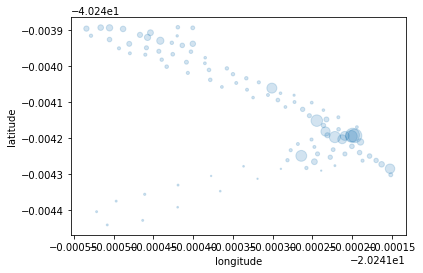

In [45]:
df = pd.DataFrame(kmeans.cluster_centers_, columns=['longitude','latitude'])
df['counts'] = counts
df.plot(kind="scatter", x="longitude", y="latitude", s="counts", alpha=0.2)

In [47]:
df.to_json(orient='records')

'[{"longitude":-20.2415050463,"latitude":-40.2438928634,"counts":41},{"longitude":-20.2412310852,"latitude":-40.2441918148,"counts":27},{"longitude":-20.2413330667,"latitude":-40.2440332833,"counts":12},{"longitude":-20.2415213,"latitude":-40.244404475,"counts":4},{"longitude":-20.2411514375,"latitude":-40.244301775,"counts":16},{"longitude":-20.2414430353,"latitude":-40.2439581412,"counts":17},{"longitude":-20.2412639415,"latitude":-40.2442490805,"counts":118},{"longitude":-20.2411964698,"latitude":-40.2441932085,"counts":189},{"longitude":-20.2412444511,"latitude":-40.2441511481,"counts":133},{"longitude":-20.2414572692,"latitude":-40.2439194846,"counts":39},{"longitude":-20.2413058333,"latitude":-40.2440797667,"counts":9},{"longitude":-20.241418875,"latitude":-40.24433045,"counts":4},{"longitude":-20.2414083437,"latitude":-40.2439884938,"counts":16},{"longitude":-20.2411906571,"latitude":-40.2442400667,"counts":21},{"longitude":-20.2414003333,"latitude":-40.2439372,"counts":30},{"lo